# EOS regimes

We want to divide the $\rho$-$T$ plane into regions based on which component of the pressure dominates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We need some physical constants (these are all in CGS units)

In [2]:
k_B = 1.38e-16
m_u = 1.66e-24
m_e = 9.11e-28
c = 3.e10
h = 6.63e-27
a = 5.67e-15

The boundary between ideal gas and radiation is set as:

$$\frac{\rho k T}{\mu m_u} = \frac{1}{3} a T^4$$

at the temperatures where radiation matters, we can assume that the electrons behave as an ideal gas, so the $\mu$ here is the total mean molecular weight.

Notice that this gives a line of the form: $\rho \sim T^3$

In [3]:
def rho_ideal_rad(T, mu=0.6):
    return a*T**3*mu*m_u/(3*k_B)

For non-relativisitic electron degeneracy, the boundary with the ideal gas is:

$$\frac{\rho k T}{\mu m_u} = \frac{h^2}{20 m_e} \left (\frac{3}{\pi} \right )^{2/3} \left ( \frac{\rho}{\mu_e m_u} \right)^{5/3}$$

Notice that this gives a line of the form: $\rho \sim T^{3/2}$

In [4]:
def rho_ideal_nr_deg(T, mu=0.6, mu_e=2.0):
    return ((k_B*T/(mu*m_u)) / (h**2/(20*m_e)*(3/np.pi)**(2./3.) /
                                (mu_e*m_u)**(5./3.)))**(3./2.)

For *relativisitic* electron degeneracy, the boundary with the ideal gas is:

$$\frac{\rho k T}{\mu m_u} = \frac{hc}{8} \left (\frac{3}{\pi} \right )^{1/3} \left ( \frac{\rho}{\mu_e m_u} \right)^{4/3}$$

Notice that this gives a line of the form: $\rho \sim T^3$

In [5]:
def rho_ideal_rel_deg(T, mu=0.6, mu_e=2.0):
    return ((k_B*T/(mu*m_u)) / (h*c/8 * (3/np.pi)**(1./3.) /
                                (mu_e*m_u)**(4./3.)))**3

Finally, we can determine when non-relativistic vs. relativistic degeneracy is important as:

$$P_{e,\mathrm{NR}} = P_{e,\mathrm{rel}}$$

This is just a density (with no temperature dependence).

In [11]:
def rho_rel_nr(mu_e=2.0):
    return (20*m_e*c/(8*h) * (np.pi/3)**(1./3.) * (mu_e * m_u)**(1./3.))**3

Now we can plot it.

Text(0, 0.5, '$\\rho (\\mathrm{g/cm^3})$')

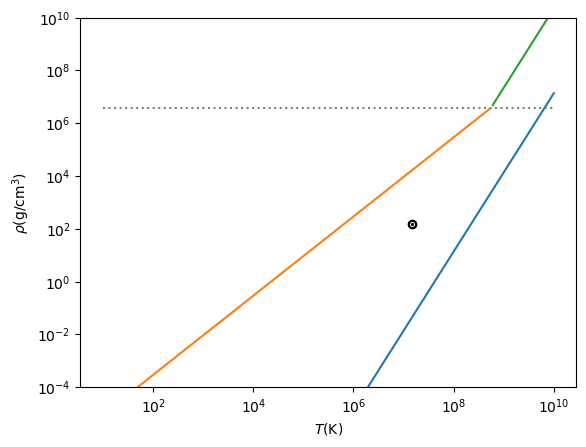

In [14]:
fig, ax = plt.subplots()

T_min = 10.0
T_max = 1.e10
T = np.logspace(np.log10(T_min), np.log10(T_max), 200)

rho_transition = rho_rel_nr()

ax.loglog(T, rho_ideal_rad(T))

rho_nr = rho_ideal_nr_deg(T)
ax.loglog(T[rho_nr <= rho_transition], rho_nr[rho_nr <= rho_transition])
rho_rel = rho_ideal_rel_deg(T)
ax.loglog(T[rho_rel >= rho_transition], rho_rel[rho_rel >= rho_transition])

ax.loglog([T_min, T_max], [rho_transition, rho_transition], ls=":", color="0.5")

# plot the sun
T_sun = 1.5e7
rho_sun = 150
ax.scatter([T_sun], [rho_sun], marker=r"$\odot$", color="k")

ax.set_ylim(1.e-4, 1.e10)
ax.set_xlabel(r"$T (\mathrm{K})$")
ax.set_ylabel(r"$\rho (\mathrm{g/cm^3})$")

We see the following:

* at low density and high temperature, radiation dominates
* at high density and low to moderate temperatures, degeneracy dominates
* the Sun is located in the region where the ideal gas is dominant